<a href="https://colab.research.google.com/github/NONTAWAT149/DRL-Continuous-Control/blob/main/SETTrading_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The idea of trading algorithm is from "Python for Algorithmic Trading" - O'Reilly 2021 (page 162)

#### 1. Import libraries

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11775253686338188030
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10383230313109506723
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

#### 2. Import Data and Visualisation

In [3]:
# import data

df = pd.read_csv('setth_dataset.csv', index_col = 'Date')

In [4]:
#df = df[df['ticker'] == 'SCB.BK']

In [5]:
df

,Close,Volume,return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,momentum,volatility,distance,data_type,ticker,direction
Date,,,,,,,,,,,,,,,,,,,
2023-04-26,0.496309,-0.568551,0.790396,-2.196122,0.033924,0.035978,-1.034493,-0.655546,0.051037,0.397614,-0.309370,0.042895,0.400361,-1.115264,0.599902,-1.050739,training_data,AAV.BK,1
2023-04-27,0.674156,-0.338104,1.149153,0.788679,-2.196122,0.035978,0.041080,-1.029527,-0.657899,0.043230,0.399234,-0.311531,0.045378,-0.089248,0.956138,-0.415456,training_data,AAV.BK,1
2023-04-28,0.792720,-0.214725,0.762005,1.144563,0.788679,-2.195190,0.041080,0.053137,-1.032013,-0.668113,0.044932,0.397320,-0.309605,0.251396,1.085820,0.008064,training_data,AAV.BK,0
2023-05-02,0.614874,-0.504826,-1.073276,0.760515,1.144563,0.791112,-2.184263,0.053137,0.051037,-1.043497,-0.666249,0.042895,0.400361,-0.261496,1.345064,-0.477739,training_data,AAV.BK,1
2023-05-03,0.792720,-0.311945,1.132374,-1.060071,0.760515,1.147176,0.794243,-2.186876,0.051037,0.043230,-1.041547,-0.668534,0.045378,1.296897,-0.030793,0.120172,training_data,AAV.BK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,-0.310658,-0.442654,-0.242062,-0.007209,0.458152,0.221422,-0.252094,-0.489695,-0.017661,0.211554,0.211103,-0.029594,-0.265055,0.089975,-1.430363,0.113490,testing_data,WHA.BK,0
2024-03-26,-0.310658,-1.369240,-0.010728,-0.238835,-0.005993,0.454131,0.218634,-0.256285,-0.487666,-0.023451,0.210123,0.206004,-0.029465,0.208078,-1.518772,0.037401,testing_data,WHA.BK,0
2024-03-27,-0.375093,-0.341047,-0.243028,-0.007209,-0.237582,-0.014231,0.451058,0.216442,-0.254140,-0.494443,-0.024773,0.205025,0.206125,-0.027635,-1.473673,-0.143309,testing_data,WHA.BK,0


In [6]:
feature_name = list(df.columns)

In [7]:
feature_name.remove('data_type')
feature_name.remove('ticker')
feature_name.remove('direction')
#feature_name.remove('Volume')

In [8]:
feature_name

['Close',
 'Volume',
 'return',
 'lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10',
 'momentum',
 'volatility',
 'distance']

#### 4. Experiment with Deep Learning

In [9]:
training_data = df[df['data_type'] == 'training_data']

In [10]:
testing_data = df[df['data_type'] == 'testing_data']

In [11]:
training_data

,Close,Volume,return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,momentum,volatility,distance,data_type,ticker,direction
Date,,,,,,,,,,,,,,,,,,,
2023-04-26,0.496309,-0.568551,0.790396,-2.196122,0.033924,0.035978,-1.034493,-0.655546,0.051037,0.397614,-0.309370,0.042895,0.400361,-1.115264,0.599902,-1.050739,training_data,AAV.BK,1
2023-04-27,0.674156,-0.338104,1.149153,0.788679,-2.196122,0.035978,0.041080,-1.029527,-0.657899,0.043230,0.399234,-0.311531,0.045378,-0.089248,0.956138,-0.415456,training_data,AAV.BK,1
2023-04-28,0.792720,-0.214725,0.762005,1.144563,0.788679,-2.195190,0.041080,0.053137,-1.032013,-0.668113,0.044932,0.397320,-0.309605,0.251396,1.085820,0.008064,training_data,AAV.BK,0
2023-05-02,0.614874,-0.504826,-1.073276,0.760515,1.144563,0.791112,-2.184263,0.053137,0.051037,-1.043497,-0.666249,0.042895,0.400361,-0.261496,1.345064,-0.477739,training_data,AAV.BK,1
2023-05-03,0.792720,-0.311945,1.132374,-1.060071,0.760515,1.147176,0.794243,-2.186876,0.051037,0.043230,-1.041547,-0.668534,0.045378,1.296897,-0.030793,0.120172,training_data,AAV.BK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,-0.697270,1.290695,-1.650642,0.457012,-0.930448,0.217535,-0.248212,-0.251431,-0.248337,-0.253670,-0.024773,0.431027,-0.490069,-1.090688,-0.138042,-1.237085,training_data,WHA.BK,1
2024-02-23,-0.632835,-0.747718,0.226524,-1.649198,0.458152,-0.947084,0.214752,-0.252386,-0.249285,-0.254612,-0.254885,-0.029594,0.431140,-0.854415,-0.023781,-1.056374,training_data,WHA.BK,0
2024-02-27,-1.148316,0.930419,-1.937699,0.230344,-1.647717,0.454131,-0.948440,0.212543,-0.250240,-0.255561,-0.255827,-0.259434,-0.029465,-1.946165,0.358846,-2.112102,training_data,WHA.BK,0


In [12]:
training_data.shape

(20493, 19)

In [13]:
testing_data

,Close,Volume,return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,momentum,volatility,distance,data_type,ticker,direction
Date,,,,,,,,,,,,,,,,,,,
2024-03-01,-0.452206,-0.479848,0.461919,-1.241627,0.033924,0.457671,0.041080,1.784232,-0.387672,-1.254163,0.044932,-0.382110,0.900443,-0.117617,-0.604639,-0.004393,testing_data,AAV.BK,1
2024-03-04,-0.452206,-0.039717,0.029549,0.462831,-1.241627,0.035978,0.461672,0.053137,1.782748,-0.396969,-1.252164,0.042895,-0.380296,-0.117617,-0.604639,0.008064,testing_data,AAV.BK,1
2024-03-05,-0.392924,-0.284487,0.458143,0.033924,0.462831,-1.240214,0.041080,0.476502,0.051037,1.780823,-0.395166,-1.254653,0.045378,-0.115891,-0.602901,0.219824,testing_data,AAV.BK,1
2024-03-06,-0.274359,-0.268147,0.875668,0.459085,0.033924,0.465101,-1.231781,0.053137,0.474552,0.043230,1.782127,-0.397357,-1.254213,0.277614,-0.300407,0.593518,testing_data,AAV.BK,0
2024-03-07,-0.392924,-0.691498,-0.816569,0.873267,0.459085,0.035978,0.469083,-1.228115,0.051037,0.468184,0.044932,1.780693,-0.395567,0.482119,-0.762508,0.207367,testing_data,AAV.BK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,-0.310658,-0.442654,-0.242062,-0.007209,0.458152,0.221422,-0.252094,-0.489695,-0.017661,0.211554,0.211103,-0.029594,-0.265055,0.089975,-1.430363,0.113490,testing_data,WHA.BK,0
2024-03-26,-0.310658,-1.369240,-0.010728,-0.238835,-0.005993,0.454131,0.218634,-0.256285,-0.487666,-0.023451,0.210123,0.206004,-0.029465,0.208078,-1.518772,0.037401,testing_data,WHA.BK,0
2024-03-27,-0.375093,-0.341047,-0.243028,-0.007209,-0.237582,-0.014231,0.451058,0.216442,-0.254140,-0.494443,-0.024773,0.205025,0.206125,-0.027635,-1.473673,-0.143309,testing_data,WHA.BK,0


#### 4.2 Build Sequence model

In [14]:
import tensorflow as tf
from keras.models import Model
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, LSTM, BatchNormalization
#from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.losses import sparse_categorical_crossentropy
from keras.models import Sequential

In [15]:
testing_data.shape

(2079, 19)

In [16]:
feature_num = len(feature_name)

#### 4.3 Train and Run Model Prediction

In [17]:
# Training data processing

In [18]:
x_metric = training_data[feature_name].to_numpy()


In [19]:
x_metric.shape

(20493, 16)

In [20]:
x_metric[0]

array([ 0.49630903, -0.5685512 ,  0.79039626, -2.196122  ,  0.03392359,
        0.03597782, -1.03449321, -0.65554648,  0.05103665,  0.39761357,
       -0.30936997,  0.04289456,  0.40036135, -1.11526402,  0.5999023 ,
       -1.05073909])

In [21]:
x = x_metric.reshape((x_metric.shape[0], 1, feature_num))

In [22]:
x[0]

array([[ 0.49630903, -0.5685512 ,  0.79039626, -2.196122  ,  0.03392359,
         0.03597782, -1.03449321, -0.65554648,  0.05103665,  0.39761357,
        -0.30936997,  0.04289456,  0.40036135, -1.11526402,  0.5999023 ,
        -1.05073909]])

In [23]:
x.shape

(20493, 1, 16)

In [24]:
y = training_data['direction'].to_numpy()

In [25]:
y.shape

(20493,)

In [26]:
y

array([1, 1, 0, ..., 0, 1, 0])

In [27]:
# Testing data processing

In [28]:
x_testing_metric = testing_data[feature_name].to_numpy()
x_test = x_testing_metric.reshape((x_testing_metric.shape[0], 1, feature_num))

In [29]:
y_test = testing_data['direction'].to_numpy()

Model Structure

In [30]:
import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [31]:
learning_rate = 1e-3

def sequence_model(learning_rate, feature_num):
  model = Sequential()
  model.add(BatchNormalization())
  model.add(LSTM(8, activation = 'relu', input_shape=(1, feature_num), return_sequences=True))
  model.add(BatchNormalization())
  model.add(LSTM(1, activation = 'relu', return_sequences=False))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(loss=BinaryCrossentropy(from_logits=True),
                    optimizer=Adam(learning_rate),
                    metrics=['accuracy'])

  return model

In [32]:
model = sequence_model(learning_rate, feature_num)

history = model.fit(x, y, epochs=500,
          validation_data=(x_test, y_test),
          callbacks=[cp_callback])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


638/641 [============================>.] - ETA: 0s - loss: 0.6926 - accuracy: 0.5180
Epoch 1: saving model to training_1/cp.ckpt
641/641 [==============================] - 11s 9ms/step - loss: 0.6926 - accuracy: 0.5182 - val_loss: 0.6863 - val_accuracy: 0.5777
Epoch 2/500
638/641 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5328
Epoch 2: saving model to training_1/cp.ckpt
641/641 [==============================] - 5s 7ms/step - loss: 0.6907 - accuracy: 0.5327 - val_loss: 0.6824 - val_accuracy: 0.5878
Epoch 3/500
635/641 [============================>.] - ETA: 0s - loss: 0.6880 - accuracy: 0.5496
Epoch 3: saving model to training_1/cp.ckpt
641/641 [==============================] - 5s 7ms/step - loss: 0.6878 - accuracy: 0.5500 - val_loss: 0.6800 - val_accuracy: 0.5859
Epoch 4/500
637/641 [============================>.] - ETA: 0s - loss: 0.6867 - accuracy: 0.5522
Epoch 4: saving model to training_1/cp.ckpt
641/641 [==============================] - 5s 7ms/step

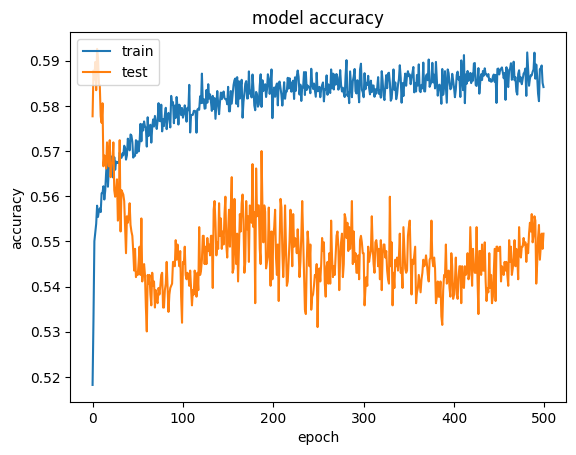

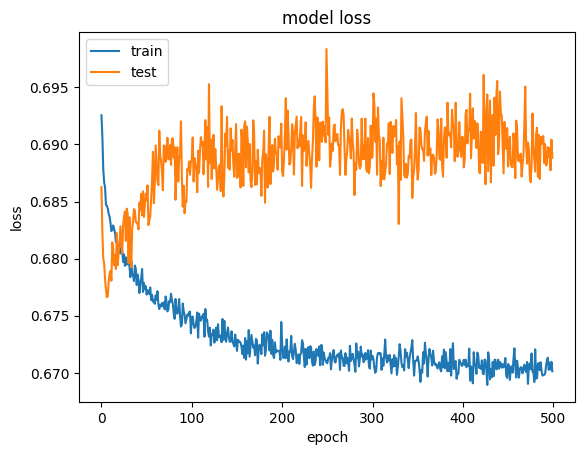

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 1, 16)             64        
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, 1, 8)              800       
                                                                 
 batch_normalization_1 (Bat  (None, 1, 8)              32        
 chNormalization)                                                
                                                                 
 lstm_1 (LSTM)               (None, 1)                 40        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 938 (3.66 KB)
Trainable params: 890 (3.48 

In [35]:
os.listdir(checkpoint_dir)

['cp.ckpt.index', 'checkpoint', 'cp.ckpt.data-00000-of-00001']

In [36]:
# demonstrate prediction

x_input = testing_data[feature_name].to_numpy()[0]
x_input = x_input.reshape((1, 1, feature_num))
yhat = model.predict(x_input, verbose=0)

In [37]:
yhat

array([[0.44045895]], dtype=float32)

In [38]:
x_input

array([[[-0.4522057 , -0.47984764,  0.46191893, -1.24162677,
          0.03392359,  0.45767058,  0.04107991,  1.78423152,
         -0.38767234, -1.25416297,  0.04493209, -0.38210972,
          0.90044276, -0.11761674, -0.60463932, -0.00439272]]])

In [39]:
y_input = testing_data['direction'].to_numpy()[0]

In [40]:
y_input

1

#### 4.4 Model Evaluation

In [41]:
model.evaluate(x_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5517


[0.6888299584388733, 0.5517075657844543]

In [42]:
y_test.shape[0]

2079

In [43]:
y_predict = []
for i in range(10):
  y_hat = model.predict(x_test[i].reshape((1, 1, feature_num)), verbose=0)
  print('{} Groundtruth: {}, Prediction: {}'.format(i, y_test[i], y_hat[0][0]))
  y_predict.append(y_hat[0][0])

0 Groundtruth: 1, Prediction: 0.4404589533805847
1 Groundtruth: 1, Prediction: 0.5810912847518921
2 Groundtruth: 1, Prediction: 0.3925958573818207
3 Groundtruth: 0, Prediction: 0.6724091172218323
4 Groundtruth: 1, Prediction: 0.5592527389526367
5 Groundtruth: 0, Prediction: 0.42915162444114685
6 Groundtruth: 1, Prediction: 0.41476917266845703
7 Groundtruth: 0, Prediction: 0.5488376617431641
8 Groundtruth: 1, Prediction: 0.582677960395813
9 Groundtruth: 1, Prediction: 0.5542317628860474


In [44]:
y_training_predict = []
for i in range(10):
  y_hat = model.predict(x[i].reshape((1, 1, feature_num)), verbose=0)
  print('{} Groundtruth: {}, Prediction: {}'.format(i, y[i], y_hat[0][0]))
  y_training_predict.append(y_hat[0][0])

0 Groundtruth: 1, Prediction: 0.5340666770935059
1 Groundtruth: 1, Prediction: 0.5546633005142212
2 Groundtruth: 0, Prediction: 0.5852945446968079
3 Groundtruth: 1, Prediction: 0.4988904893398285
4 Groundtruth: 1, Prediction: 0.6393535137176514
5 Groundtruth: 1, Prediction: 0.2579743564128876
6 Groundtruth: 1, Prediction: 0.5477629899978638
7 Groundtruth: 0, Prediction: 0.658052921295166
8 Groundtruth: 1, Prediction: 0.5492590069770813
9 Groundtruth: 0, Prediction: 0.36829233169555664


In [45]:
testing_data.iloc[14]

Close             -0.03723
Volume           -0.671208
return            0.847462
lag_1            -0.373449
lag_2            -0.370068
lag_3            -1.548071
lag_4             1.221172
lag_5             3.369552
lag_6            -1.219573
lag_7              0.04323
lag_8            -0.372693
lag_9             1.307025
lag_10           -0.802315
momentum         -0.106133
volatility        0.444832
distance          0.705628
data_type     testing_data
ticker              AAV.BK
direction                1
Name: 2024-03-21, dtype: object

In [46]:
testing_data.iloc[13]

Close            -0.155794
Volume           -0.576198
return           -0.381111
lag_1            -0.370068
lag_2            -1.549329
lag_3             1.219158
lag_4             3.335776
lag_5             -1.21702
lag_6             0.051037
lag_7             -0.37449
lag_8             1.308623
lag_9            -0.803466
lag_10            0.893071
momentum          1.061379
volatility        2.488042
distance          0.431586
data_type     testing_data
ticker              AAV.BK
direction                1
Name: 2024-03-20, dtype: object

### 4.5 Load Model

In [47]:
os.listdir(checkpoint_dir)

['cp.ckpt.index', 'checkpoint', 'cp.ckpt.data-00000-of-00001']

In [48]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [49]:
# Create a new model instance
new_model = sequence_model(learning_rate, feature_num)

# Load the previously saved weights
new_model.load_weights(latest)

# Re-evaluate the model
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


65/65 - 1s - loss: 0.6888 - accuracy: 0.5517 - 852ms/epoch - 13ms/step
Restored model, accuracy: 55.17%


In [50]:
new_model.predict(x_test[1].reshape(1, 1, feature_num))

1/1 [==============================] - 0s 264ms/step


array([[0.5810913]], dtype=float32)

#### 4.6 Save entire model

Call model.save to save a model's architecture, weights, and training configuration in a single file/folder. This allows you to export a model so it can be used without access to the original Python code*. Since the optimizer-state is recovered, you can resume training from exactly where you left off.

An entire model can be saved in two different file formats (SavedModel and HDF5). The TensorFlow SavedModel format is the default file format in TF2.x. However, models can be saved in HDF5 format. More details on saving entire models in the two file formats is described below.

Saving a fully-functional model is very useful—you can load them in TensorFlow.js (Saved Model, HDF5) and then train and run them in web browsers, or convert them to run on mobile devices using TensorFlow Lite (Saved Model, HDF5)

*Custom objects (e.g. subclassed models or layers) require special attention when saving and loading. See the Saving custom objects section below

In [51]:
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
# Recreate the exact same model, including its weights and the optimizer
new_model_2 = tf.keras.models.load_model('lstm_model.h5')

# Show the model architecture
new_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 1, 16)             64        
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, 1, 8)              800       
                                                                 
 batch_normalization_1 (Bat  (None, 1, 8)              32        
 chNormalization)                                                
                                                                 
 lstm_1 (LSTM)               (None, 1)                 40        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 938 (3.66 KB)
Trainable params: 890 (3.48 

In [53]:
# Re-evaluate the model
loss, acc = new_model_2.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

65/65 - 0s - loss: 0.6888 - accuracy: 0.5517 - 469ms/epoch - 7ms/step
Restored model, accuracy: 55.17%


In [54]:
new_model_2.predict(x_test[1].reshape(1, 1, feature_num))

1/1 [==============================] - 0s 270ms/step


array([[0.5810913]], dtype=float32)

In [55]:
x_test[-1]

array([[-0.43952834, -0.66675257, -0.24400217, -0.00720878, -0.23854902,
        -0.01423099, -0.25013675, -0.0199213 ,  0.45234521,  0.21352479,
        -0.26163919, -0.49981088, -0.02946479, -0.38046786, -1.83491229,
        -0.29548628]])

In [56]:
new_model_2.predict(x_test[-1].reshape(1, 1, feature_num))

1/1 [==============================] - 0s 17ms/step


array([[0.5351146]], dtype=float32)